In [1]:
import pandas as pd
import os
import re
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import shutil
from scipy import stats
import requests


In [2]:
today_energy_inv01_2020 = pd.read_csv("2020_today_energy_data.csv", index_col=[0])
temp_inv01_2020 = pd.read_csv("2020_temp_data.csv")
irr_wms01_2020 = pd.read_csv("2020_irradiance_data_wms01.csv")
temp_wms01_2020 = pd.read_csv("2020_temp_data_wms01.csv")

In [3]:
today_energy_inv01_2020.head()

,Date,Timestamp,Value,Signal
0,2020-01-01 00:32:00,1577818920000,0,Inv01_Today_Energy
1,2020-01-01 00:33:00,1577818980000,0,Inv01_Today_Energy
2,2020-01-01 08:24:00,1577847240000,0,Inv01_Today_Energy
3,2020-01-01 08:25:00,1577847300000,0,Inv01_Today_Energy
4,2020-01-01 08:26:00,1577847360000,0,Inv01_Today_Energy


In [4]:
today_energy_inv01_2020.rename(columns={"Value": "Inv01_Today_Energy"}, inplace=True)

In [5]:
inv01_2020 = today_energy_inv01_2020[(today_energy_inv01_2020[['Inv01_Today_Energy']] > 0).all(axis=1)]

In [6]:
inv01_2020 = inv01_2020.drop(['Signal'], axis=1)

In [7]:
inv01_2020.head()

,Date,Timestamp,Inv01_Today_Energy
45785,2020-03-15 12:35:00,1584255900000,1
45786,2020-03-15 12:36:00,1584255960000,2
45787,2020-03-15 12:37:00,1584256020000,2
45788,2020-03-15 12:38:00,1584256080000,3
45789,2020-03-15 12:39:00,1584256140000,3


In [8]:
inv01_2020.Inv01_Today_Energy.describe()

count    196675.000000
mean       1127.436756
std        1005.223301
min           1.000000
25%         248.000000
50%         986.000000
75%        1811.000000
max       63737.000000
Name: Inv01_Today_Energy, dtype: float64

/Users/qilu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


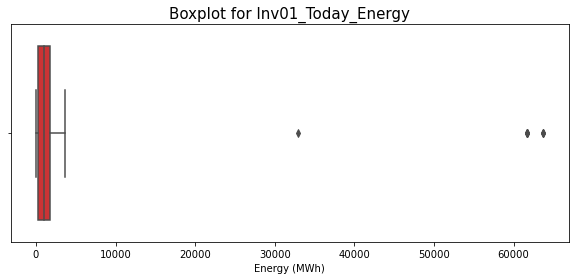

In [9]:
plt.rcParams['figure.figsize'] = (10, 4)
sns.boxplot(inv01_2020['Inv01_Today_Energy'], palette="Set1");
plt.title('Boxplot for Inv01_Today_Energy', fontsize = 15)
plt.xlabel('Energy (MWh)')
plt.show();

In [10]:
energyQ1 = inv01_2020.Inv01_Today_Energy.quantile(0.25)
energyQ3 = inv01_2020.Inv01_Today_Energy.quantile(0.75)
energyUpper = energyQ3 + 1.5*(energyQ3-energyQ1)
energyUpper

4155.5

In [11]:
inv01_2020 = inv01_2020[(inv01_2020[['Inv01_Today_Energy']] < energyUpper).all(axis=1)]

In [12]:
inv01_2020.Inv01_Today_Energy.describe()

count    196666.000000
mean       1124.780465
std         923.226460
min           1.000000
25%         248.000000
50%         986.000000
75%        1811.000000
max        3576.000000
Name: Inv01_Today_Energy, dtype: float64

/Users/qilu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


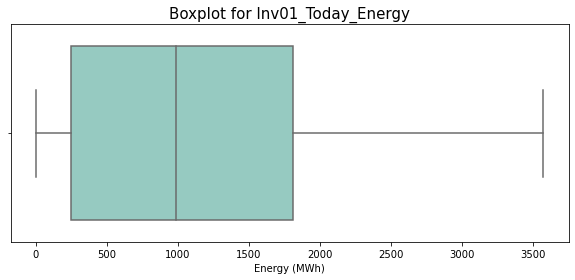

In [13]:
plt.rcParams['figure.figsize'] = (10, 4)
sns.boxplot(inv01_2020['Inv01_Today_Energy'], palette="Set3");
plt.title('Boxplot for Inv01_Today_Energy', fontsize = 15)
plt.xlabel('Energy (MWh)')
plt.show();

In [14]:
inv01_2020.head()

,Date,Timestamp,Inv01_Today_Energy
45785,2020-03-15 12:35:00,1584255900000,1
45786,2020-03-15 12:36:00,1584255960000,2
45787,2020-03-15 12:37:00,1584256020000,2
45788,2020-03-15 12:38:00,1584256080000,3
45789,2020-03-15 12:39:00,1584256140000,3


In [15]:
temp_inv01_2020.head()

,Unnamed: 0,Date,Timestamp,Value,Signal
0,0,2020-01-01 00:32:00,1577818920000,0,Inv01_Temp
1,1,2020-01-01 00:33:00,1577818980000,0,Inv01_Temp
2,2,2020-01-01 08:24:00,1577847240000,0,Inv01_Temp
3,3,2020-01-01 08:25:00,1577847300000,0,Inv01_Temp
4,4,2020-01-01 08:26:00,1577847360000,0,Inv01_Temp


In [16]:
temp_inv01_2020.loc[:, 'Value'] = temp_inv01_2020.Value.apply(lambda x: x/10)

In [17]:
temp_inv01_2020.rename(columns={"Value": "Inv01_Temp"}, inplace=True)

In [18]:
inv01_2020 = pd.merge(inv01_2020,
                 temp_inv01_2020[['Timestamp', 'Inv01_Temp']],
                 on='Timestamp')

In [19]:
inv01_2020.Inv01_Temp.describe()

count    197026.000000
mean         44.273300
std          30.964634
min           0.000000
25%          40.900000
50%          44.100000
75%          47.500000
max        6451.300000
Name: Inv01_Temp, dtype: float64

/Users/qilu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


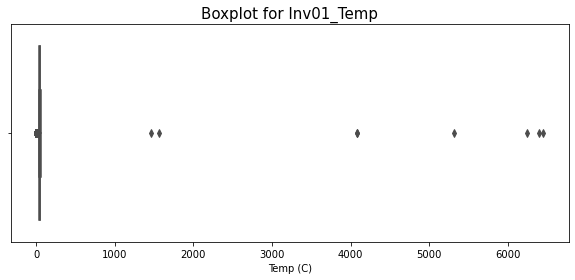

In [20]:
plt.rcParams['figure.figsize'] = (10, 4)
sns.boxplot(inv01_2020['Inv01_Temp'], palette="Set1");
plt.title('Boxplot for Inv01_Temp', fontsize = 15)
plt.xlabel('Temp (C)')
plt.show();

In [21]:
invTempQ1 = inv01_2020.Inv01_Temp.quantile(0.25)
invTempQ3 = inv01_2020.Inv01_Temp.quantile(0.75)
invTempUpper = invTempQ3 + 1.5*(invTempQ3-invTempQ1)
invTempUpper

57.400000000000006

In [22]:
invTemplower = invTempQ1 - 1.5*(invTempQ3-invTempQ1)
invTemplower

30.999999999999996

In [23]:
inv01_2020 = inv01_2020[((inv01_2020[['Inv01_Temp']] > invTemplower) & (inv01_2020[['Inv01_Temp']] < invTempUpper)).all(axis=1)]

In [24]:
inv01_2020.Inv01_Temp.describe()

count    196484.000000
mean         44.158056
std           4.443877
min          31.000000
25%          40.900000
50%          44.100000
75%          47.500000
max          57.000000
Name: Inv01_Temp, dtype: float64

/Users/qilu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


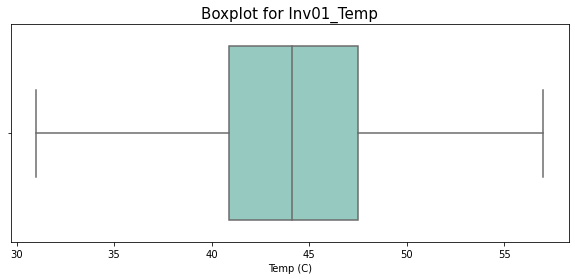

In [25]:
plt.rcParams['figure.figsize'] = (10, 4)
sns.boxplot(inv01_2020['Inv01_Temp'], palette="Set3");
plt.title('Boxplot for Inv01_Temp', fontsize = 15)
plt.xlabel('Temp (C)')
plt.show();

In [26]:
inv01_2020.head()

,Date,Timestamp,Inv01_Today_Energy,Inv01_Temp
0,2020-03-15 12:35:00,1584255900000,1,33.8
1,2020-03-15 12:36:00,1584255960000,2,34.6
2,2020-03-15 12:37:00,1584256020000,2,35.4
3,2020-03-15 12:38:00,1584256080000,3,36.0
4,2020-03-15 12:39:00,1584256140000,3,36.7


In [27]:
irr_wms01_2020.head()

,Unnamed: 0,Date,Timestamp,Value,Signal
0,0,2020-01-01 00:32:00,1577818920000,0,Wms01_Irradiance
1,1,2020-01-01 08:24:00,1577847240000,0,Wms01_Irradiance
2,2,2020-01-01 08:25:00,1577847300000,203,Wms01_Irradiance
3,3,2020-01-01 08:26:00,1577847360000,163,Wms01_Irradiance
4,4,2020-01-01 08:27:00,1577847420000,160,Wms01_Irradiance


In [28]:
irr_wms01_2020.rename(columns={"Value": "Wms01_Irr"}, inplace=True)

In [29]:
inv01_2020 = pd.merge(inv01_2020,
                 irr_wms01_2020[['Timestamp', 'Wms01_Irr']],
                 on='Timestamp')

In [30]:
inv01_2020.Wms01_Irr.describe()

count    181870.000000
mean        431.002018
std         331.710449
min           0.000000
25%         149.000000
50%         360.000000
75%         690.000000
max       16384.000000
Name: Wms01_Irr, dtype: float64

/Users/qilu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


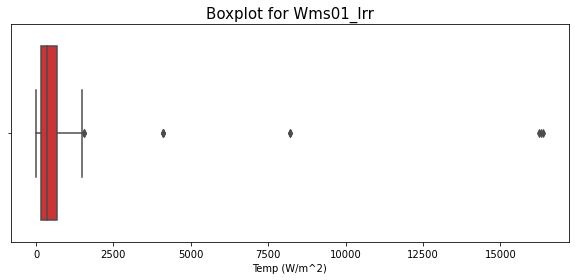

In [31]:
plt.rcParams['figure.figsize'] = (10, 4)
sns.boxplot(inv01_2020['Wms01_Irr'], palette="Set1");
plt.title('Boxplot for Wms01_Irr', fontsize = 15)
plt.xlabel('Temp (W/m^2)')
plt.show();

In [32]:
irrQ1 = inv01_2020.Wms01_Irr.quantile(0.25)
irrQ3 = inv01_2020.Wms01_Irr.quantile(0.75)
irrUpper = irrQ3 + 1.5*(irrQ3-irrQ1)
irrUpper

1501.5

In [33]:
irrLower = irrQ1 - 1.5*(irrQ3-irrQ1)
irrLower

-662.5

In [34]:
inv01_2020 = inv01_2020[((inv01_2020[['Wms01_Irr']] > 0) & (inv01_2020[['Wms01_Irr']] < irrUpper)).all(axis=1)]

In [35]:
inv01_2020.Wms01_Irr.describe()

count    179980.000000
mean        435.079587
std         322.669272
min           1.000000
25%         155.000000
50%         365.000000
75%         694.000000
max        1480.000000
Name: Wms01_Irr, dtype: float64

/Users/qilu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


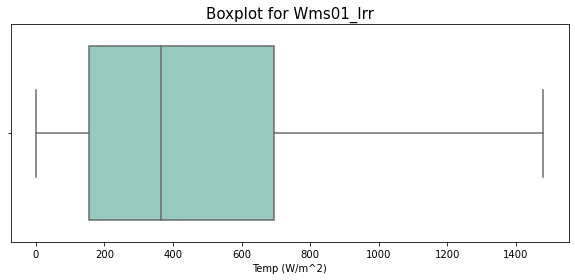

In [36]:
plt.rcParams['figure.figsize'] = (10, 4)
sns.boxplot(inv01_2020['Wms01_Irr'], palette="Set3");
plt.title('Boxplot for Wms01_Irr', fontsize = 15)
plt.xlabel('Temp (W/m^2)')
plt.show();

In [37]:
inv01_2020.head()

,Date,Timestamp,Inv01_Today_Energy,Inv01_Temp,Wms01_Irr
0,2020-03-15 12:35:00,1584255900000,1,33.8,935
1,2020-03-15 12:36:00,1584255960000,2,34.6,944
2,2020-03-15 12:37:00,1584256020000,2,35.4,955
3,2020-03-15 12:38:00,1584256080000,3,36.0,948
4,2020-03-15 12:39:00,1584256140000,3,36.7,944


In [38]:
temp_wms01_2020.head()

,Unnamed: 0,Date,Timestamp,Value,Signal
0,0,2020-01-01 00:32:00,1577818920000,0,Wms01_Temp
1,1,2020-01-01 00:33:00,1577818980000,198,Wms01_Temp
2,2,2020-01-01 08:24:00,1577847240000,0,Wms01_Temp
3,3,2020-01-01 08:25:00,1577847300000,212,Wms01_Temp
4,4,2020-01-01 08:26:00,1577847360000,213,Wms01_Temp


In [39]:
temp_wms01_2020.loc[:, 'Value'] = temp_wms01_2020.Value.apply(lambda x: x/10)

In [40]:
temp_wms01_2020.rename(columns={"Value": "Wms01_Temp"}, inplace=True)

In [41]:
inv01_2020 = pd.merge(inv01_2020,
                 temp_wms01_2020[['Timestamp', 'Wms01_Temp']],
                 on='Timestamp')

In [42]:
inv01_2020.Wms01_Temp.describe()

count    180996.000000
mean         28.124872
std           7.473891
min       -1584.500000
25%          24.600000
50%          27.800000
75%          31.200000
max        1568.000000
Name: Wms01_Temp, dtype: float64

/Users/qilu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


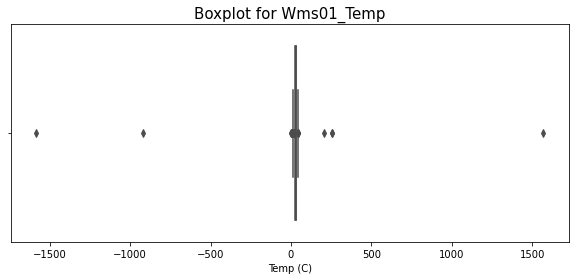

In [43]:
plt.rcParams['figure.figsize'] = (10, 4)
sns.boxplot(inv01_2020['Wms01_Temp'], palette="Set1");
plt.title('Boxplot for Wms01_Temp', fontsize = 15)
plt.xlabel('Temp (C)')
plt.show();

In [44]:
wms01TempQ1 = inv01_2020.Wms01_Temp.quantile(0.25)
wms01TempQ3 = inv01_2020.Wms01_Temp.quantile(0.75)
wms01TempUpper = wms01TempQ3 + 1.5*(wms01TempQ3-wms01TempQ1)
wms01TempUpper

41.099999999999994

In [45]:
wms01TempLower = wms01TempQ1 - 1.5*(wms01TempQ3-wms01TempQ1)
wms01TempLower

14.700000000000005

In [46]:
inv01_2020 = inv01_2020[((inv01_2020[['Wms01_Temp']] > wms01TempLower)& (inv01_2020[['Wms01_Temp']] <wms01TempUpper)).all(axis=1)]

In [47]:
inv01_2020.Wms01_Temp.describe()

count    180948.000000
mean         28.129743
std           4.756180
min          14.800000
25%          24.600000
50%          27.800000
75%          31.200000
max          41.000000
Name: Wms01_Temp, dtype: float64

/Users/qilu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


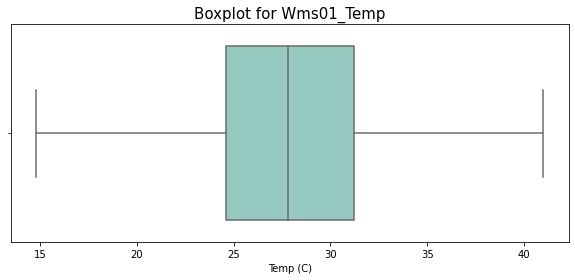

In [48]:
plt.rcParams['figure.figsize'] = (10, 4)
sns.boxplot(inv01_2020['Wms01_Temp'], palette="Set3");
plt.title('Boxplot for Wms01_Temp', fontsize = 15)
plt.xlabel('Temp (C)')
plt.show();

In [49]:
inv01_2020.head(50)

,Date,Timestamp,Inv01_Today_Energy,Inv01_Temp,Wms01_Irr,Wms01_Temp
0,2020-03-15 12:35:00,1584255900000,1,33.8,935,36.9
1,2020-03-15 12:36:00,1584255960000,2,34.6,944,36.7
2,2020-03-15 12:37:00,1584256020000,2,35.4,955,36.6
3,2020-03-15 12:38:00,1584256080000,3,36.0,948,36.4
4,2020-03-15 12:39:00,1584256140000,3,36.7,944,36.7
5,2020-03-15 12:40:00,1584256200000,4,37.2,941,36.9
6,2020-03-15 12:41:00,1584256260000,4,37.7,942,36.9
7,2020-03-15 12:42:00,1584256320000,5,38.2,943,37.1
8,2020-03-15 12:43:00,1584256380000,5,38.6,943,37.3
9,2020-03-15 12:44:00,1584256440000,6,39.1,941,37.3


In [50]:
inv01_2020.loc[:, 'Date'] = pd.to_datetime(inv01_2020[['Date']].stack()).unstack()
inv01_2020.loc[:, 'Only_Date'] = inv01_2020.Date.apply(lambda x: str(x.date()))
inv01_2020.loc[:, 'Hour'] = inv01_2020.Date.apply(lambda x: int(str(x.time()).split(':')[0]))
inv01_2020.loc[:, 'Minute'] = inv01_2020.Date.apply(lambda x: int(str(x.time()).split(':')[1]))
inv01_2020 = inv01_2020.drop(['Date'], axis=1)
inv01_2020.rename(columns={"Only_Date": "Date"}, inplace=True)

In [51]:
inv01_2020.head()

,Timestamp,Inv01_Today_Energy,Inv01_Temp,Wms01_Irr,Wms01_Temp,Date,Hour,Minute
0,1584255900000,1,33.8,935,36.9,2020-03-15,12,35
1,1584255960000,2,34.6,944,36.7,2020-03-15,12,36
2,1584256020000,2,35.4,955,36.6,2020-03-15,12,37
3,1584256080000,3,36.0,948,36.4,2020-03-15,12,38
4,1584256140000,3,36.7,944,36.7,2020-03-15,12,39


In [52]:
def quarter(x):
    if x < 16:
        return 1
    elif x < 31:
        return 2
    elif x < 46:
        return 3
    else:
        return 4
        

In [53]:
inv01_2020.loc[:, 'Quarter'] = inv01_2020.Minute.apply(lambda x: quarter(x))

In [54]:
inv01_2020.head()

,Timestamp,Inv01_Today_Energy,Inv01_Temp,Wms01_Irr,Wms01_Temp,Date,Hour,Minute,Quarter
0,1584255900000,1,33.8,935,36.9,2020-03-15,12,35,3
1,1584255960000,2,34.6,944,36.7,2020-03-15,12,36,3
2,1584256020000,2,35.4,955,36.6,2020-03-15,12,37,3
3,1584256080000,3,36.0,948,36.4,2020-03-15,12,38,3
4,1584256140000,3,36.7,944,36.7,2020-03-15,12,39,3


In [55]:
inv01_2020['Date_Hour_Quarter'] = inv01_2020['Date'].astype(str) + '_' + inv01_2020['Hour'].astype(str) + '_' + inv01_2020['Quarter'].astype(str)

In [56]:
inv01_2020 = inv01_2020.drop(['Date', 'Hour', 'Minute', 'Quarter'], axis=1)

In [57]:
inv01_2020['Inv01_Today_Energy_Copy'] = inv01_2020['Inv01_Today_Energy']
inv01_2020['Timestamp_Copy'] = inv01_2020['Timestamp']

In [58]:
inv01_2020.head(30)

,Timestamp,Inv01_Today_Energy,Inv01_Temp,Wms01_Irr,Wms01_Temp,Date_Hour_Quarter,Inv01_Today_Energy_Copy,Timestamp_Copy
0,1584255900000,1,33.8,935,36.9,2020-03-15_12_3,1,1584255900000
1,1584255960000,2,34.6,944,36.7,2020-03-15_12_3,2,1584255960000
2,1584256020000,2,35.4,955,36.6,2020-03-15_12_3,2,1584256020000
3,1584256080000,3,36.0,948,36.4,2020-03-15_12_3,3,1584256080000
4,1584256140000,3,36.7,944,36.7,2020-03-15_12_3,3,1584256140000
5,1584256200000,4,37.2,941,36.9,2020-03-15_12_3,4,1584256200000
6,1584256260000,4,37.7,942,36.9,2020-03-15_12_3,4,1584256260000
7,1584256320000,5,38.2,943,37.1,2020-03-15_12_3,5,1584256320000
8,1584256380000,5,38.6,943,37.3,2020-03-15_12_3,5,1584256380000
9,1584256440000,6,39.1,941,37.3,2020-03-15_12_3,6,1584256440000


In [59]:
agg_functions = {'Date_Hour_Quarter': 'first',
                 'Timestamp': 'min',
                 'Timestamp_Copy': 'max',                 
                 'Inv01_Temp': 'mean',
                 'Wms01_Irr': 'mean',
                 'Wms01_Temp': 'mean',
                 'Inv01_Today_Energy': 'min',
                 'Inv01_Today_Energy_Copy': 'max'}
#create new DataFrame by combining rows with same id values
inv01_2020 = inv01_2020.groupby(inv01_2020['Date_Hour_Quarter']).aggregate(agg_functions)


In [60]:
inv01_2020.head()

,Date_Hour_Quarter,Timestamp,Timestamp_Copy,Inv01_Temp,Wms01_Irr,Wms01_Temp,Inv01_Today_Energy,Inv01_Today_Energy_Copy
Date_Hour_Quarter,,,,,,,,
2020-03-15_12_3,2020-03-15_12_3,1584255900000,1584256500000,36.981818,943.272727,36.909091,1,6
2020-03-15_12_4,2020-03-15_12_4,1584256560000,1584257340000,41.857143,939.785714,35.785714,7,14
2020-03-15_13_1,2020-03-15_13_1,1584257400000,1584258300000,45.118750,940.312500,35.012500,14,22
2020-03-15_13_2,2020-03-15_13_2,1584258360000,1584259200000,47.273333,928.466667,35.206667,23,30
2020-03-15_13_3,2020-03-15_13_3,1584259260000,1584260100000,48.640000,905.933333,35.460000,31,38


In [61]:
inv01_2020['Time_Past'] = (inv01_2020['Timestamp_Copy']- inv01_2020['Timestamp'])/60000

In [62]:
inv01_2020['Quarterly_Average_Energy'] = (inv01_2020['Inv01_Today_Energy_Copy']- inv01_2020['Inv01_Today_Energy'])/inv01_2020['Time_Past']

In [63]:
inv01_2020.head()

,Date_Hour_Quarter,Timestamp,Timestamp_Copy,Inv01_Temp,Wms01_Irr,Wms01_Temp,Inv01_Today_Energy,Inv01_Today_Energy_Copy,Time_Past,Quarterly_Average_Energy
Date_Hour_Quarter,,,,,,,,,,
2020-03-15_12_3,2020-03-15_12_3,1584255900000,1584256500000,36.981818,943.272727,36.909091,1,6,10.0,0.500000
2020-03-15_12_4,2020-03-15_12_4,1584256560000,1584257340000,41.857143,939.785714,35.785714,7,14,13.0,0.538462
2020-03-15_13_1,2020-03-15_13_1,1584257400000,1584258300000,45.118750,940.312500,35.012500,14,22,15.0,0.533333
2020-03-15_13_2,2020-03-15_13_2,1584258360000,1584259200000,47.273333,928.466667,35.206667,23,30,14.0,0.500000
2020-03-15_13_3,2020-03-15_13_3,1584259260000,1584260100000,48.640000,905.933333,35.460000,31,38,14.0,0.500000


In [64]:
inv01_2020 = inv01_2020.drop(['Timestamp', 'Timestamp_Copy'], axis=1)
inv01_2020.rename(columns={"Inv01_Today_Energy": "Inv01_Today_Energy_Start"}, inplace=True)
inv01_2020.rename(columns={"Inv01_Today_Energy_Copy": "Inv01_Today_Energy_End"}, inplace=True)

In [65]:
inv01_2020.head()

,Date_Hour_Quarter,Inv01_Temp,Wms01_Irr,Wms01_Temp,Inv01_Today_Energy_Start,Inv01_Today_Energy_End,Time_Past,Quarterly_Average_Energy
Date_Hour_Quarter,,,,,,,,
2020-03-15_12_3,2020-03-15_12_3,36.981818,943.272727,36.909091,1,6,10.0,0.500000
2020-03-15_12_4,2020-03-15_12_4,41.857143,939.785714,35.785714,7,14,13.0,0.538462
2020-03-15_13_1,2020-03-15_13_1,45.118750,940.312500,35.012500,14,22,15.0,0.533333
2020-03-15_13_2,2020-03-15_13_2,47.273333,928.466667,35.206667,23,30,14.0,0.500000
2020-03-15_13_3,2020-03-15_13_3,48.640000,905.933333,35.460000,31,38,14.0,0.500000


In [66]:
inv01_2020['Energy'] = inv01_2020['Inv01_Today_Energy_End'] - inv01_2020['Inv01_Today_Energy_Start']

In [67]:
inv01_2020_test = inv01_2020.tail(25)

In [68]:
inv01_2020_test

,Date_Hour_Quarter,Inv01_Temp,Wms01_Irr,Wms01_Temp,Inv01_Today_Energy_Start,Inv01_Today_Energy_End,Time_Past,Quarterly_Average_Energy,Energy
Date_Hour_Quarter,,,,,,,,,
2020-12-31_14_2,2020-12-31_14_2,41.606667,473.333333,26.520000,921,978,14.0,4.071429,57
2020-12-31_14_3,2020-12-31_14_3,40.806667,382.333333,26.173333,982,1027,14.0,3.214286,45
2020-12-31_14_4,2020-12-31_14_4,40.035714,388.000000,25.900000,1031,1074,13.0,3.307692,43
2020-12-31_15_1,2020-12-31_15_1,40.162500,605.250000,27.456250,1077,1154,15.0,5.133333,77
2020-12-31_15_2,2020-12-31_15_2,40.620000,235.466667,26.513333,1157,1185,14.0,2.000000,28
2020-12-31_15_3,2020-12-31_15_3,44.300000,157.000000,24.960000,1186,1204,14.0,1.285714,18
2020-12-31_15_4,2020-12-31_15_4,47.992857,201.285714,24.621429,1206,1229,13.0,1.769231,23
2020-12-31_16_1,2020-12-31_16_1,49.137500,212.687500,24.812500,1230,1257,15.0,1.800000,27
2020-12-31_16_2,2020-12-31_16_2,49.657143,174.785714,24.700000,1259,1278,13.0,1.461538,19


In [69]:
inv01_2020_test = inv01_2020_test[inv01_2020_test["Quarterly_Average_Energy"].notna()]

In [70]:
inv01_2020_test

,Date_Hour_Quarter,Inv01_Temp,Wms01_Irr,Wms01_Temp,Inv01_Today_Energy_Start,Inv01_Today_Energy_End,Time_Past,Quarterly_Average_Energy,Energy
Date_Hour_Quarter,,,,,,,,,
2020-12-31_14_2,2020-12-31_14_2,41.606667,473.333333,26.520000,921,978,14.0,4.071429,57
2020-12-31_14_3,2020-12-31_14_3,40.806667,382.333333,26.173333,982,1027,14.0,3.214286,45
2020-12-31_14_4,2020-12-31_14_4,40.035714,388.000000,25.900000,1031,1074,13.0,3.307692,43
2020-12-31_15_1,2020-12-31_15_1,40.162500,605.250000,27.456250,1077,1154,15.0,5.133333,77
2020-12-31_15_2,2020-12-31_15_2,40.620000,235.466667,26.513333,1157,1185,14.0,2.000000,28
2020-12-31_15_3,2020-12-31_15_3,44.300000,157.000000,24.960000,1186,1204,14.0,1.285714,18
2020-12-31_15_4,2020-12-31_15_4,47.992857,201.285714,24.621429,1206,1229,13.0,1.769231,23
2020-12-31_16_1,2020-12-31_16_1,49.137500,212.687500,24.812500,1230,1257,15.0,1.800000,27
2020-12-31_16_2,2020-12-31_16_2,49.657143,174.785714,24.700000,1259,1278,13.0,1.461538,19


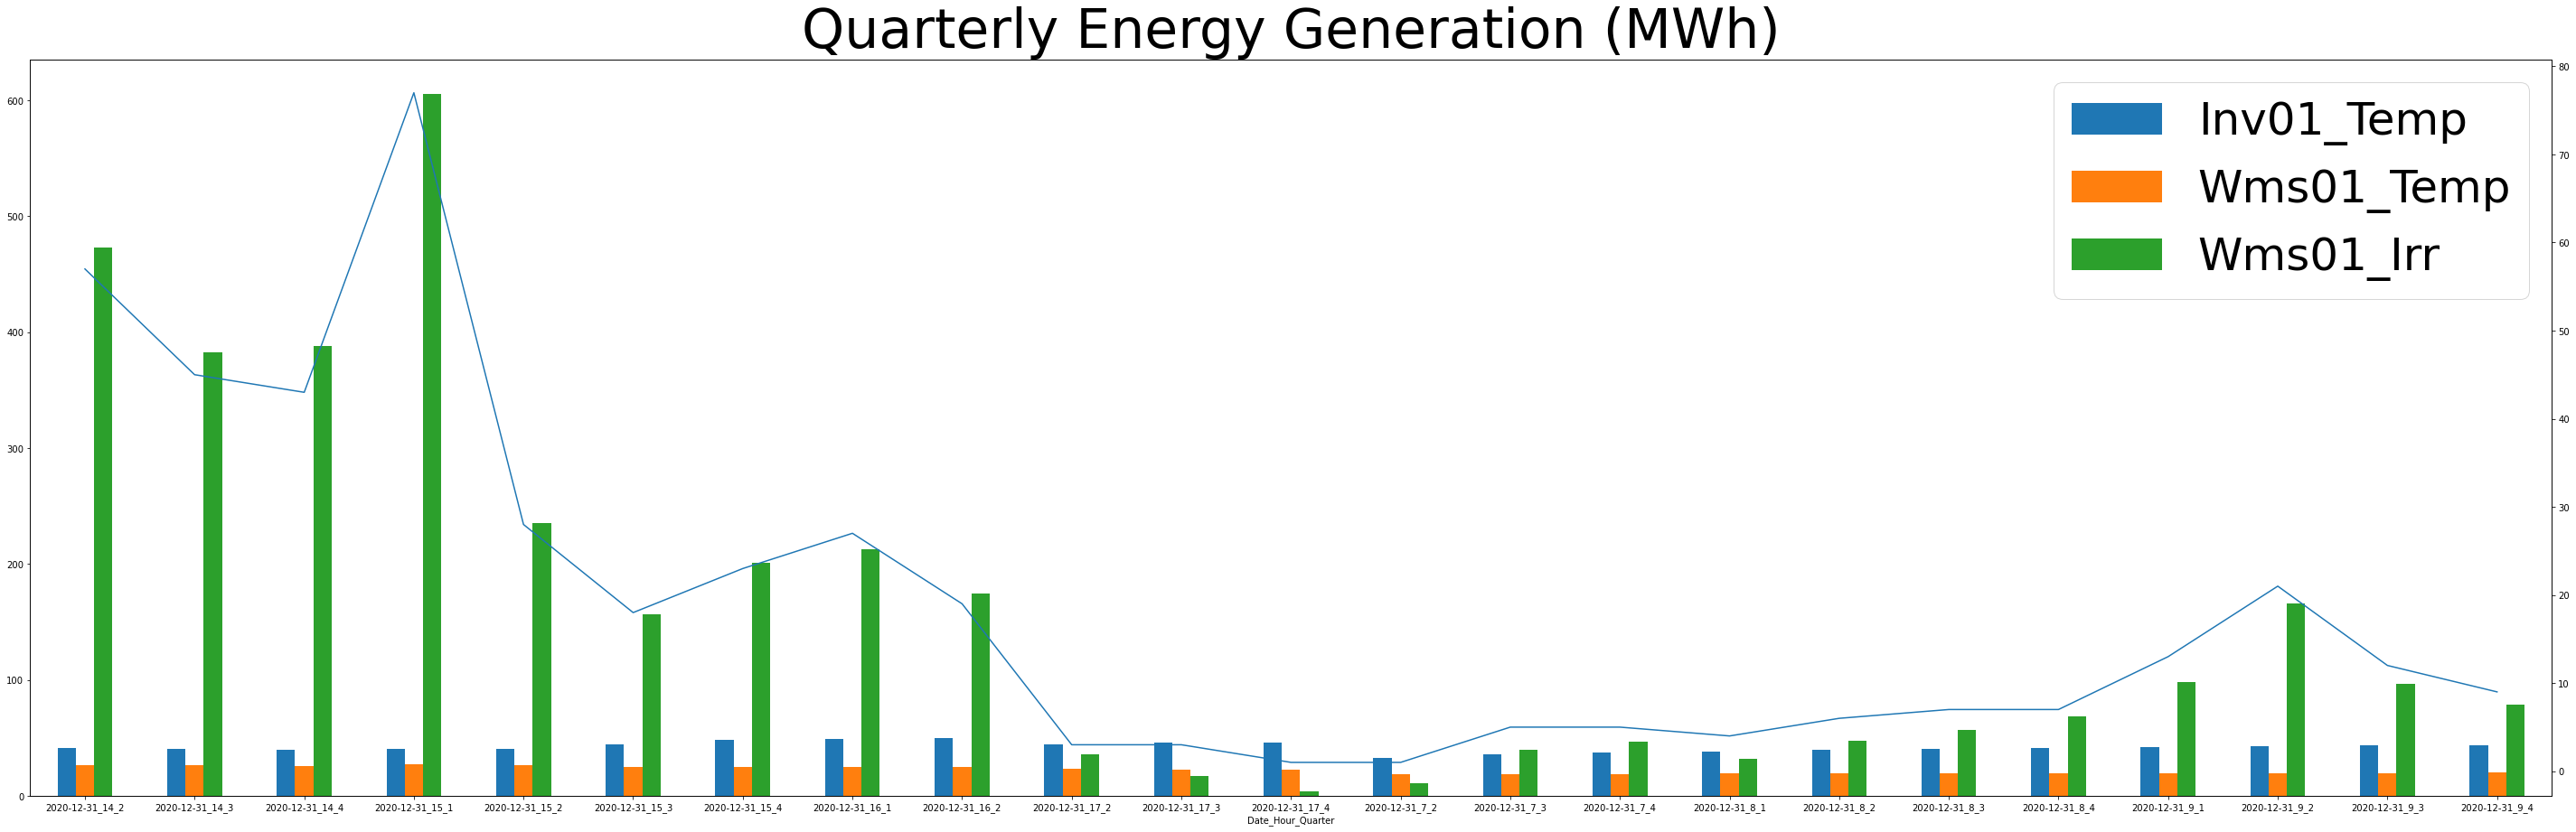

In [74]:

plt.rcParams['figure.figsize'] = (50, 15)
plt.rcParams['legend.fontsize'] = 50
width = 0.5 # width of a bar

inv01_2020_test[['Inv01_Temp','Wms01_Temp','Wms01_Irr']].plot(kind='bar', width = width)
inv01_2020_test['Energy'].plot(secondary_y=True)
plt.title('Quarterly Energy Generation (MWh)',  fontsize = 60)
ax = plt.gca()
plt.xlim([-width, len(inv01_2020_test['Wms01_Irr'])-width])
ax.set_xticklabels(inv01_2020_test['Date_Hour_Quarter'])
plt.rcParams['legend.fontsize'] = 50

plt.savefig('Energy.png')
plt.show()


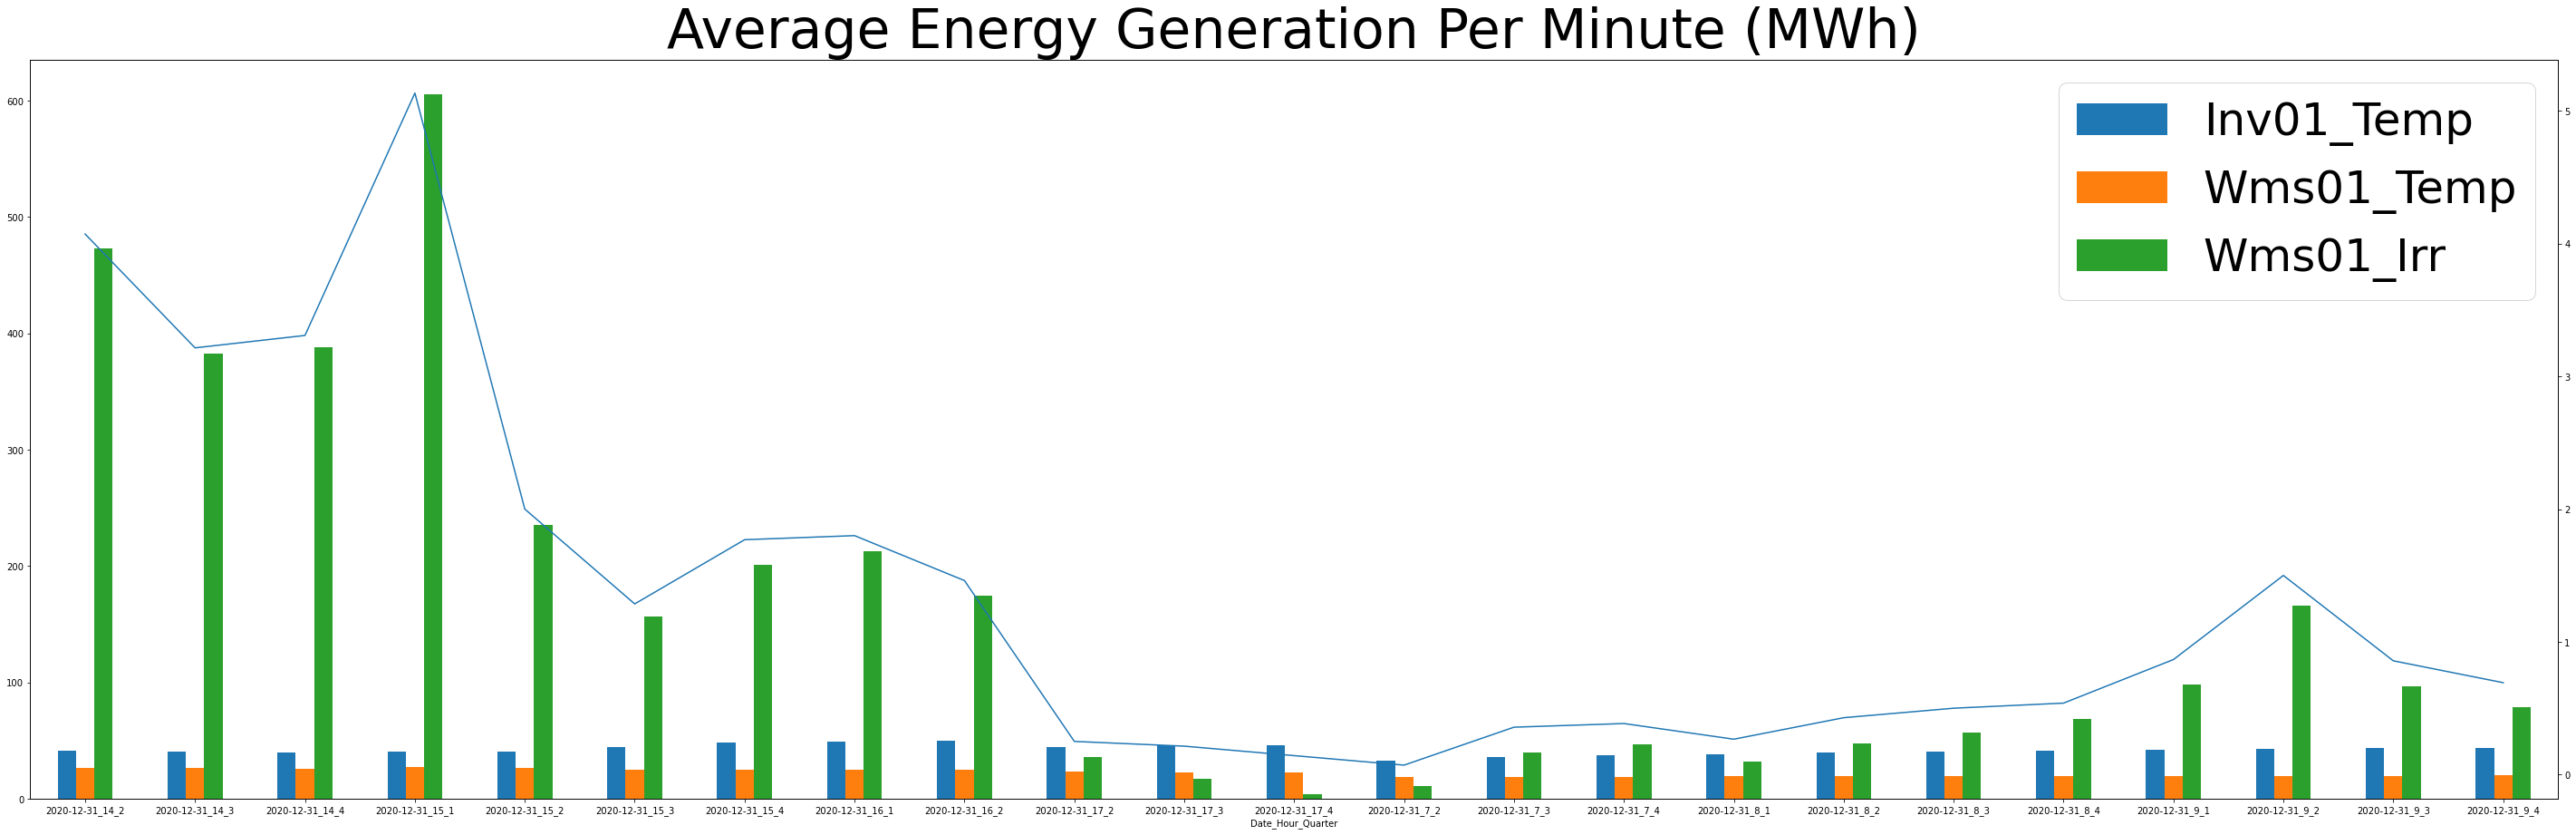

In [72]:
plt.rcParams['figure.figsize'] = (50, 15)
width = 0.5 # width of a bar

inv01_2020_test[['Inv01_Temp','Wms01_Temp','Wms01_Irr']].plot(kind='bar', width = width)
inv01_2020_test['Quarterly_Average_Energy'].plot(secondary_y=True)
plt.title('Average Energy Generation Per Minute (MWh)',  fontsize = 60)
ax = plt.gca()
plt.xlim([-width, len(inv01_2020_test['Wms01_Irr'])-width])
ax.set_xticklabels(inv01_2020_test['Date_Hour_Quarter'])


plt.savefig('Average_Energy.png')
plt.show()

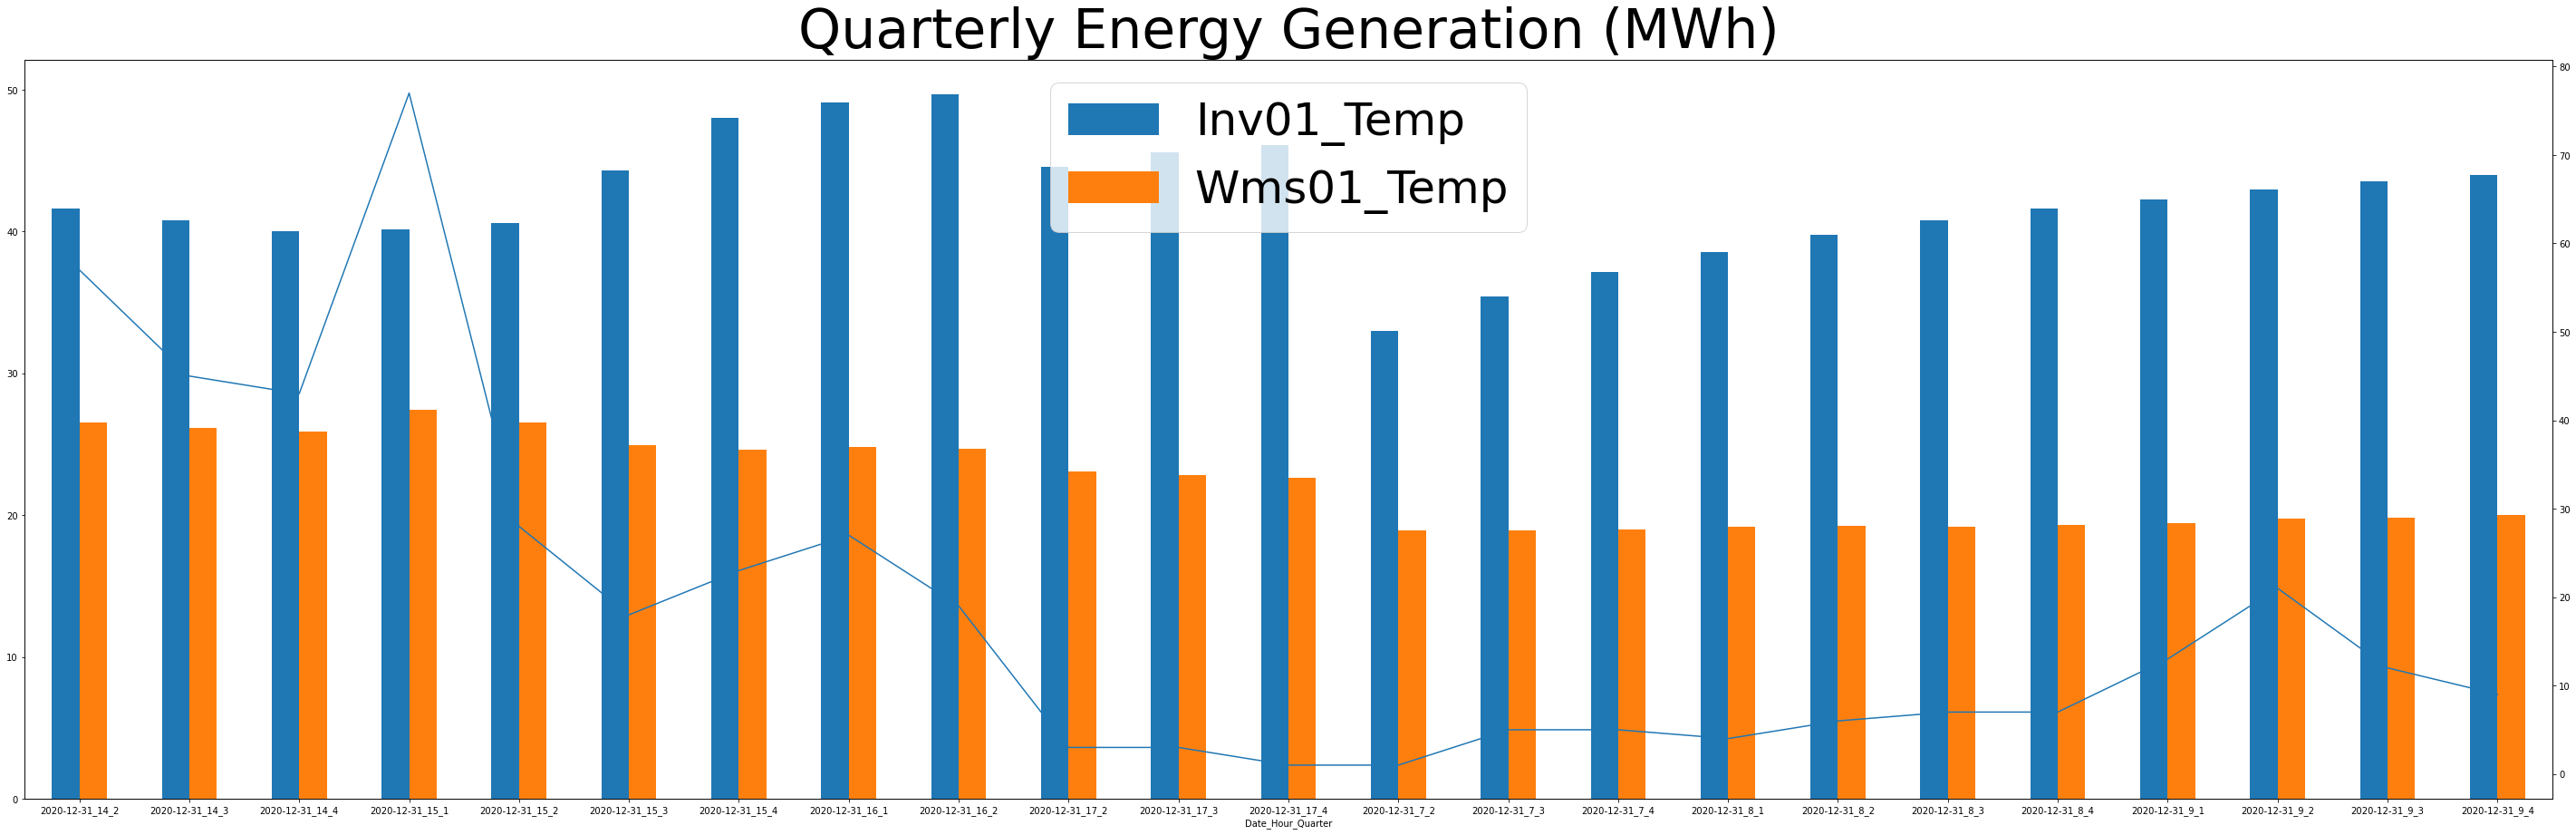

In [75]:

plt.rcParams['figure.figsize'] = (50, 15)
plt.rcParams['legend.fontsize'] = 50
width = 0.5 # width of a bar

inv01_2020_test[['Inv01_Temp','Wms01_Temp']].plot(kind='bar', width = width)
inv01_2020_test['Energy'].plot(secondary_y=True)
plt.title('Quarterly Energy Generation (MWh)',  fontsize = 60)
ax = plt.gca()
plt.xlim([-width, len(inv01_2020_test['Wms01_Irr'])-width])
ax.set_xticklabels(inv01_2020_test['Date_Hour_Quarter'])
plt.rcParams['legend.fontsize'] = 50

plt.savefig('Energy_V_Temperature.png')
plt.show()

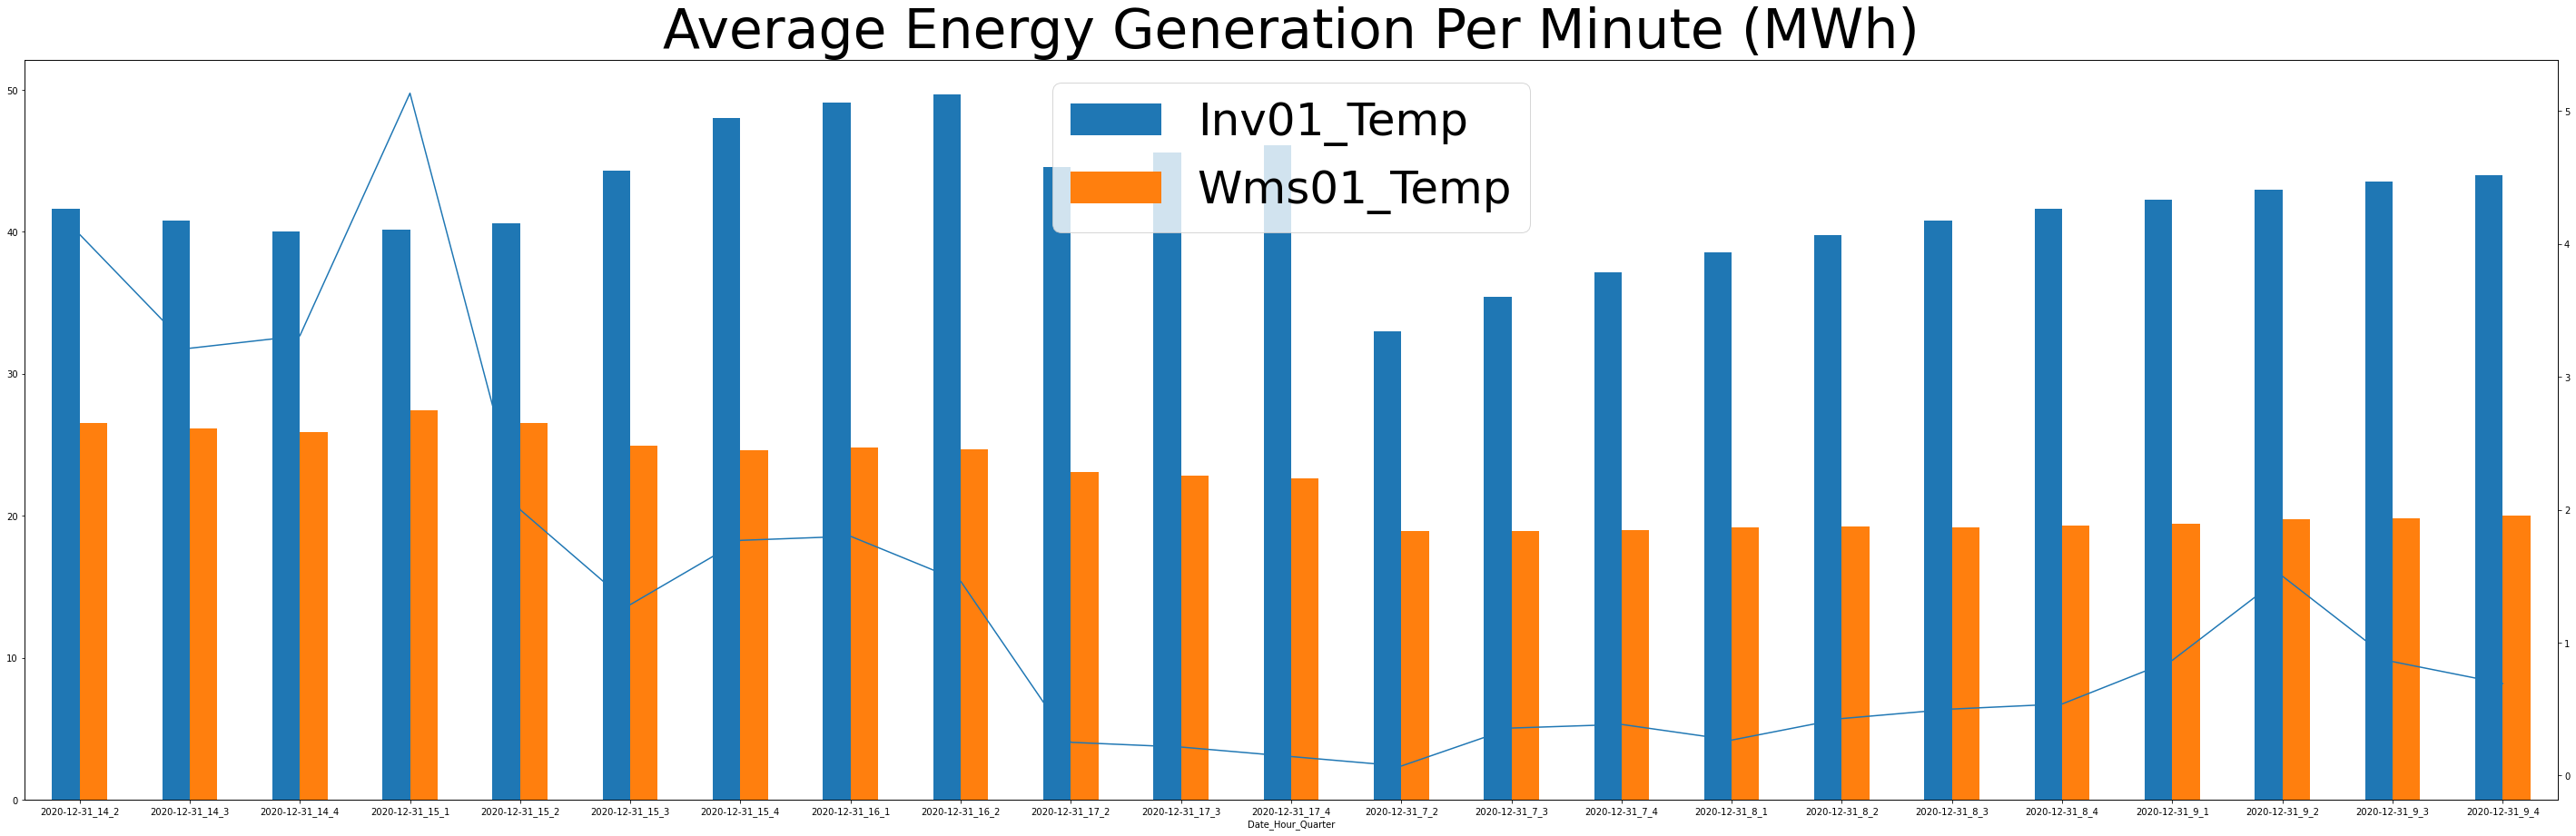

In [76]:
plt.rcParams['figure.figsize'] = (50, 15)
width = 0.5 # width of a bar

inv01_2020_test[['Inv01_Temp','Wms01_Temp']].plot(kind='bar', width = width)
inv01_2020_test['Quarterly_Average_Energy'].plot(secondary_y=True)
plt.title('Average Energy Generation Per Minute (MWh)',  fontsize = 60)
ax = plt.gca()
plt.xlim([-width, len(inv01_2020_test['Wms01_Irr'])-width])
ax.set_xticklabels(inv01_2020_test['Date_Hour_Quarter'])


plt.savefig('Average_Energy_V_Temperature.png')
plt.show()

In [73]:
# inv01_2020.to_csv("inv01_2020.csv", index=False)